**Студент**: Савин Александр Андреевич  
**Группа**: М80-114М-23  
**Лабороторная работа номер 1**

Градиентный спуск и его модификации
1. Выбрать тестовые функции оптимизации (2 шт)
2. Запрограммировать собственнуб реализацию классического градиентного спуска
3. Запрограммировать пайлайн тестирования алгоритма оптимизации
 - Визуализации функции и точки оптимума
 -  Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
 -  Визуализации точки найденного решения (можно добавить анимацию на плюс балл)
4. Запрограммировать метод вычисления градиента
 - Передача функции градиента от пользователя
 - Символьное вычисление градиента (например с помощью sympy) (на доп балл)
 - Численная аппроксимация градиента (на доп балл)
5. Запрограммировать одну моментную модификацию и протестировать ее
6. Запрограммировать одну адаптивную модификацию и протестировать ее
7. Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их

In [9]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as la
import autograd
from sympy import *

Отдельный объект для характеристик функции

In [10]:
class Function:
    def __init__(self, name, function, gradient, min_xyz, borders):
        self.name = name # имя
        self.function = function # функция
        self.gradient = gradient # градиент
        self.min_xyz = min_xyz # заданный минимум
        self.borders = borders # заданные границы по X и Y

In [17]:
def draw_result(func, bounds, glob_min, history, title, drawing):
    if drawing:
        fig = plt.figure(figsize = (7, 7))
        ax = plt.axes(projection = '3d')
        x = np.linspace(bounds[0, 0], bounds[1, 0], 100)
        y = np.linspace(bounds[0, 1], bounds[1, 1], 100)
        x_grid, y_grid = np.meshgrid(x, y)
        z_grid = func(np.array([x_grid, y_grid]))

        ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'viridis', alpha=0.5)
        ax.plot(history[:, 0], history[:, 1], history[:, 2], '-', c='black', alpha = 1)
        ax.scatter3D(history[0, 0], history[0, 1], history[0, 2], s=75, c="white", lw=2, ec='black', marker = '8')
        ax.scatter3D(history[-1, 0], history[-1, 1], history[-1, 2], s=75, c="white", lw=2, ec='black', marker = 's')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

    np.set_printoptions(formatter={'float_kind':"{:.2f}".format})
    print(title)
    print(f"Начальная точка:\t{history[0]}")
    np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
    print(f"Найденный минимум:\t{history[-1]}")
    print(f"Глобальный минимум:\t{glob_min}")
    print(f"Погрешность:\t{glob_min - history[-1]}")
    print(f"Кол-во итераций:\t{len(history)}\n")



**Функция Бута**

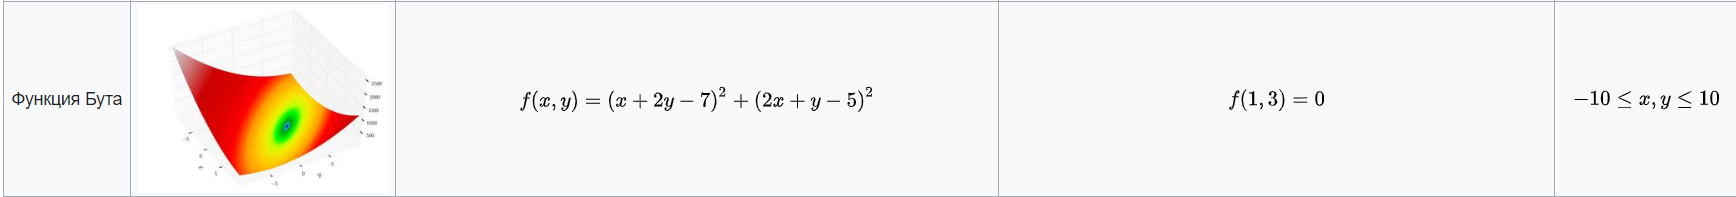

In [11]:
def booth_full_func(x):
      return (x[0] + 2 * x[1] - 7) ** 2 + (2 * x[0] + x[1] - 5) ** 2

def booth_full_func_gradient(x):
      return np.array([10 * x[0] + 8 * x[1] - 34, 8 * x[0] + 10 * x[1] - 38]) # dx, dy

In [12]:
Booth_func = Function (
    name = "Booth",
    function = booth_full_func,
    gradient = booth_full_func_gradient,
    min_xyz = np.array([1, 3, 0]),
    borders = np.array([[-10, -10], [10, 10]]),
)

**Функция Сферы**

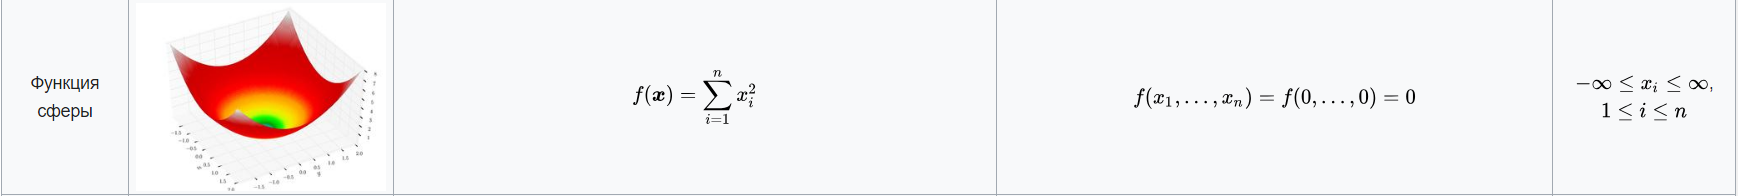

In [13]:
def sphere_full_func(x):
      return x[0] * x[0] + x[1] * x[1]

def sphere_full_func_gradient(x):
      return np.array([2 * x[0], 2 * x[1]]) # dx, dy

In [14]:
Sphere_func = Function (
    name = "Sphere",
    function = sphere_full_func,
    gradient = sphere_full_func_gradient,
    min_xyz = np.array([0, 0, 0]),
    borders = np.array([[-10, -10], [10, 10]]),
)

**Пользовательская функция**

Your function f(x, y) = (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2
Your start (x, y) : 10 10
Your min (x, y, z) : 1 3 0
Function


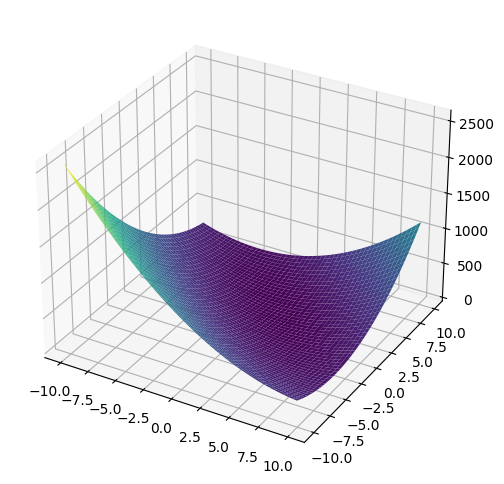

Delta : 0.0009815274646372562
GD work
Точка минимума из описания функции [1 3 0]
Точка минимума, полученная с помощью GD: [1.0006940443918464, 2.9993059556081536]


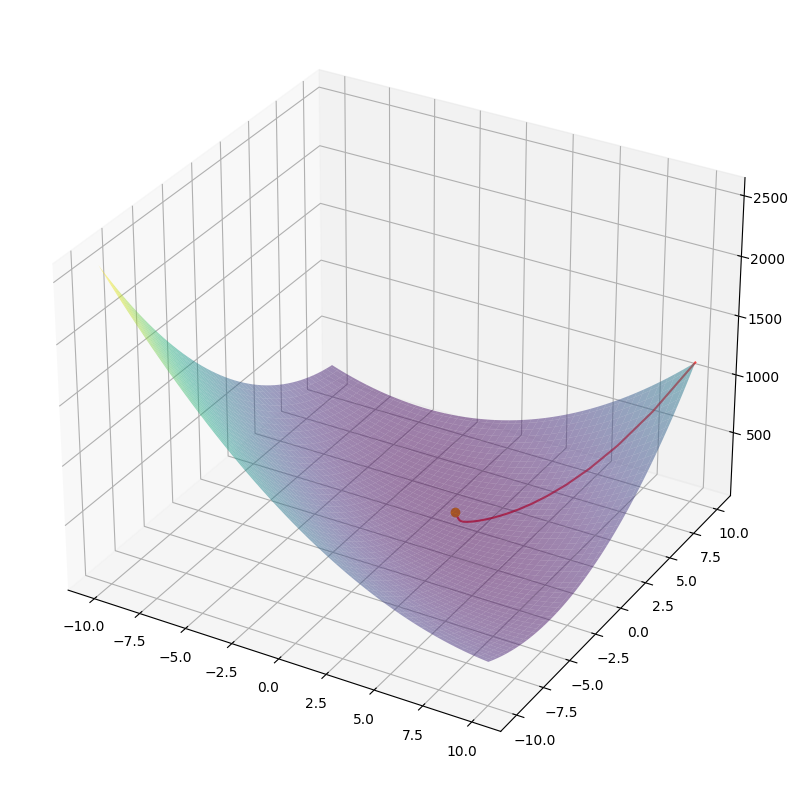

In [ ]:
def user_func(nepoch = 10000, lr = 0.01, acc = 0.001, step = 0.05):
    x, y = symbols('x, y')
    ufunc = input("Your function f(x, y) = ")
    f = eval(ufunc)
    lx, rx = -10, 10
    ly, ry = -10, 10

    start = input("Your start (x, y) : ").split()
    x0, y0 = int(start[0]), int(start[1])
    start = np.array([x0, y0])
    Df = Matrix([f]).jacobian(Matrix(list(f.free_symbols)))

    m_ = input("Your min (x, y, z) : ").split()
    minxyz = np.array([int(m_[0]), int(m_[1]), int(m_[2])])

    print("Function")
    fig = plt.figure()
    fig.set_figwidth(6)
    fig.set_figheight(6)
    x = np.arange(lx, rx, step)
    y = np.arange(ly, ry, step)
    X, Y = np.meshgrid(x, y)
    Z = eval(ufunc, {'x': X, 'y': Y})
    ax = plt.subplot(projection="3d")
    ax.plot_surface(X, Y, Z, cmap="viridis")
    plt.show()

    dx = str(Df[0])
    dy = str(Df[1])
    hist = [np.array([x0, y0, eval(ufunc, {'x': x0, 'y': y0})])]
    cur = hist[-1]
    for _ in range(nepoch):
        X_der = eval(dx, {'x': cur[0], 'y': cur[1]})
        Y_der = eval(dy, {'x': cur[0], 'y': cur[1]})
        X_new, Y_new = cur[0] - lr * X_der, cur[1] - lr * Y_der
        cur = (X_new, Y_new, eval(ufunc, {'x': X_new, 'y': Y_new }))
        if la.norm(hist[-1] - minxyz) < acc:
            break
        hist.append(cur)
    print(f"Delta : {la.norm(hist[-1] - minxyz)}")
    hist = np.array(hist)

    print("GD work")
    fig2 = plt.figure()
    fig2.set_figwidth(10)
    fig2.set_figheight(10)
    X_lin = np.linspace(-10, 10, 100)
    Y_lin = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(X_lin, Y_lin)
    Z = eval(ufunc, {'x': X, 'y': Y})

    ax = plt.axes(projection = '3d')
    ax.plot_surface(X, Y, Z, cmap = 'viridis', alpha=0.5)
    ax.plot(hist[:, 0], hist[:, 1], hist[:, 2], c='red', alpha = 0.7) # plotting route
    ax.plot(hist[-1, 0], hist[-1, 1], hist[-1, 2], color='orange', marker='o') # min_point

    xk, yk = symbols('x, y')

    print(f"Точка минимума из описания функции {minxyz}")
    print(f"Точка минимума, полученная с помощью GD: {[hist[-1][0], hist[-1][1]]}")

# (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2
# 10 10
# 1 3 0
user_func()

Собственная реализация градиентного спуска

In [18]:
def My_GD(selected_fun, start, nepoch = 64, lr = 0.01, delta = 0.001):
    fun = selected_fun.function
    glob_min = selected_fun.min_xyz
    params = start.copy()
    history = [np.array([params[0], params[1], fun(params)])]

    step = 0
    while (step < nepoch and la.norm(history[-1] - glob_min) > delta):
        params = params - lr * selected_fun.gradient(params)
        history.append(np.array([params[0], params[1], fun(params)]))
        step += 1

    return np.array(history)

My GD
Начальная точка:	[5.00 5.00 164.00]
Найденный минимум:	[1.02e+00 2.98e+00 6.19e-04]
Глобальный минимум:	[1 3 0]
Погрешность:	[-1.76e-02 1.76e-02 -6.19e-04]
Кол-во итераций:	201



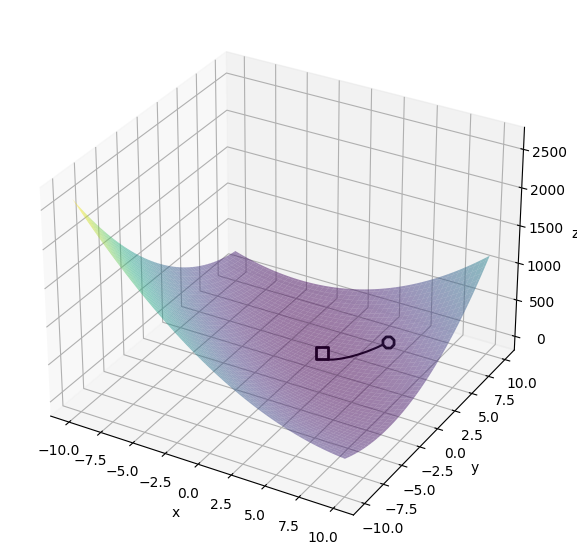

In [19]:
Booth_history = My_GD(Booth_func, start = np.array([5.0, 5.0]),
             nepoch = 200, delta = 0.001)
draw_result(Booth_func.function, Booth_func.borders, Booth_func.min_xyz, Booth_history, "My GD", drawing = True)

My GD
Начальная точка:	[5.00 5.00 50.00]
Найденный минимум:	[8.79e-02 8.79e-02 1.55e-02]
Глобальный минимум:	[0 0 0]
Погрешность:	[-8.79e-02 -8.79e-02 -1.55e-02]
Кол-во итераций:	201



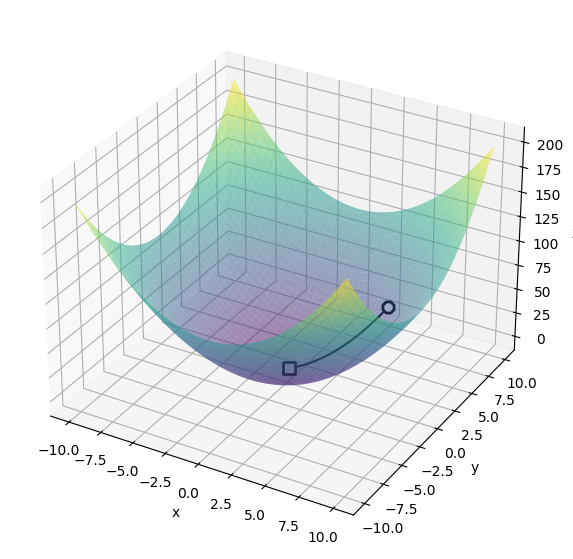

In [20]:
Sphere_history = My_GD(Sphere_func, start = np.array([5.0, 5.0]),
             nepoch = 200, delta = 0.001)
draw_result(Sphere_func.function, Sphere_func.borders, Sphere_func.min_xyz, Sphere_history, "My GD", drawing = True)

------------------

Все виды вычисления градиента в одной функции

In [21]:
def Full_Gradient_Descent(selected_fun, start, nepoch = 64,
                          lr = 0.01, delta = 0.001,
                          method = 'my_gd'):
    fun = selected_fun.function
    glob_min = selected_fun.min_xyz

    params = start.copy()
    history = [np.array([params[0], params[1], fun(params)])]

    symbolic_grad = 0
    if method == 'symbolic':
        symbolic_grad = autograd.grad(fun)

    step = 0
    while (step < nepoch and la.norm(history[-1] - glob_min) > delta):
        if method == 'my_gd':
            params = params - lr * selected_fun.gradient(params)
        elif method == 'numerically':
            dt = 0.00001
            dxdt = (fun(params + np.array([dt, 0])) - fun(params)) / dt
            dydt = (fun(params + np.array([0, dt])) - fun(params)) / dt
            params = params - lr * np.array([dxdt, dydt])
        elif method == 'symbolic':
            params = params - lr * symbolic_grad(params)
        history.append(np.array([params[0], params[1], fun(params)]))
        step += 1

    return np.array(history)

In [22]:
def all_gds(selected_func, start = np.array([5.0, 5.0]), delta = 0.001):
    nepochs = [100, 200, 300, 400]
    methods = ["my_gd", 'numerically', 'symbolic']
    for nepoch in nepochs:
        for method in methods:
            Func_history = Full_Gradient_Descent(selected_func, start = start,
                                                nepoch = nepoch, delta = delta, method = method)
            draw_result(selected_func.function, selected_func.borders,
                        selected_func.min_xyz, Func_history, selected_func.name, drawing = False)

Результаты работы всех комбинаций

In [23]:
Booth_history = all_gds(Booth_func, start = np.array([5.0, 5.0]), delta = 0.001)

Booth
Начальная точка:	[5.00 5.00 164.00]
Найденный минимум:	[1.13e+00 2.87e+00 3.52e-02]
Глобальный минимум:	[1 3 0]
Погрешность:	[-1.33e-01 1.33e-01 -3.52e-02]
Кол-во итераций:	101

Booth
Начальная точка:	[5.00 5.00 164.00]
Найденный минимум:	[1.13e+00 2.87e+00 3.52e-02]
Глобальный минимум:	[1 3 0]
Погрешность:	[-1.33e-01 1.33e-01 -3.52e-02]
Кол-во итераций:	101

Booth
Начальная точка:	[5.00 5.00 164.00]
Найденный минимум:	[1.13e+00 2.87e+00 3.52e-02]
Глобальный минимум:	[1 3 0]
Погрешность:	[-1.33e-01 1.33e-01 -3.52e-02]
Кол-во итераций:	101

Booth
Начальная точка:	[5.00 5.00 164.00]
Найденный минимум:	[1.02e+00 2.98e+00 6.19e-04]
Глобальный минимум:	[1 3 0]
Погрешность:	[-1.76e-02 1.76e-02 -6.19e-04]
Кол-во итераций:	201

Booth
Начальная точка:	[5.00 5.00 164.00]
Найденный минимум:	[1.02e+00 2.98e+00 6.19e-04]
Глобальный минимум:	[1 3 0]
Погрешность:	[-1.76e-02 1.76e-02 -6.19e-04]
Кол-во итераций:	201

Booth
Начальная точка:	[5.00 5.00 164.00]
Найденный минимум:	[1.02e+00 2.98e+00 

In [24]:
Sphere_history = all_gds(Sphere_func, start = np.array([5.0, 5.0]), delta = 0.001)

Sphere
Начальная точка:	[5.00 5.00 50.00]
Найденный минимум:	[6.63e-01 6.63e-01 8.79e-01]
Глобальный минимум:	[0 0 0]
Погрешность:	[-6.63e-01 -6.63e-01 -8.79e-01]
Кол-во итераций:	101

Sphere
Начальная точка:	[5.00 5.00 50.00]
Найденный минимум:	[6.63e-01 6.63e-01 8.79e-01]
Глобальный минимум:	[0 0 0]
Погрешность:	[-6.63e-01 -6.63e-01 -8.79e-01]
Кол-во итераций:	101

Sphere
Начальная точка:	[5.00 5.00 50.00]
Найденный минимум:	[6.63e-01 6.63e-01 8.79e-01]
Глобальный минимум:	[0 0 0]
Погрешность:	[-6.63e-01 -6.63e-01 -8.79e-01]
Кол-во итераций:	101

Sphere
Начальная точка:	[5.00 5.00 50.00]
Найденный минимум:	[8.79e-02 8.79e-02 1.55e-02]
Глобальный минимум:	[0 0 0]
Погрешность:	[-8.79e-02 -8.79e-02 -1.55e-02]
Кол-во итераций:	201

Sphere
Начальная точка:	[5.00 5.00 50.00]
Найденный минимум:	[8.79e-02 8.79e-02 1.55e-02]
Глобальный минимум:	[0 0 0]
Погрешность:	[-8.79e-02 -8.79e-02 -1.55e-02]
Кол-во итераций:	201

Sphere
Начальная точка:	[5.00 5.00 50.00]
Найденный минимум:	[8.79e-02 8.79

 Моментная модификация

In [25]:
def Gradient_Descent_Momentum(selected_fun, start, nepoch = 100,
                              lr = 0.1, beta = 0.1, delta = 0.001):
    fun = selected_fun.function
    glob_min = selected_fun.min_xyz

    params = start.copy()
    history = [np.array([params[0], params[1], fun(params)])]

    step = 0
    v_current = np.array([0, 0])
    while (step < nepoch and la.norm(history[-1] - glob_min) > delta):
        v_current = beta * v_current - lr * selected_fun.gradient(params)
        params = params + v_current

        history.append(np.array([params[0], params[1], fun(params)]))
        step += 1

    return np.array(history)


My momentum GD
Начальная точка:	[5.00 5.00 164.00]
Найденный минимум:	[1.00e+00 3.00e+00 9.75e-07]
Глобальный минимум:	[1 3 0]
Погрешность:	[-6.98e-04 6.98e-04 -9.75e-07]
Кол-во итераций:	29



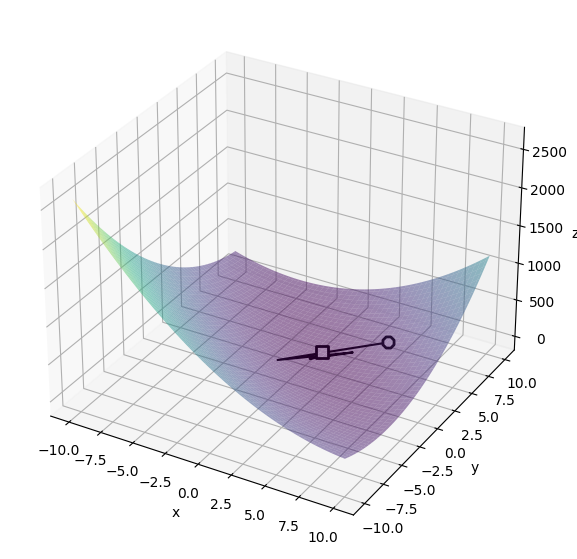

In [26]:
Booth_history_momentum = Gradient_Descent_Momentum(Booth_func, start = np.array([5.0, 5.0]),
             nepoch = 200, delta = 0.001)
draw_result(Booth_func.function, Booth_func.borders, Booth_func.min_xyz, Booth_history_momentum, "My momentum GD", drawing = True)

My momentum GD
Начальная точка:	[5.00 5.00 50.00]
Найденный минимум:	[5.61e-04 5.61e-04 6.30e-07]
Глобальный минимум:	[0 0 0]
Погрешность:	[-5.61e-04 -5.61e-04 -6.30e-07]
Кол-во итераций:	36



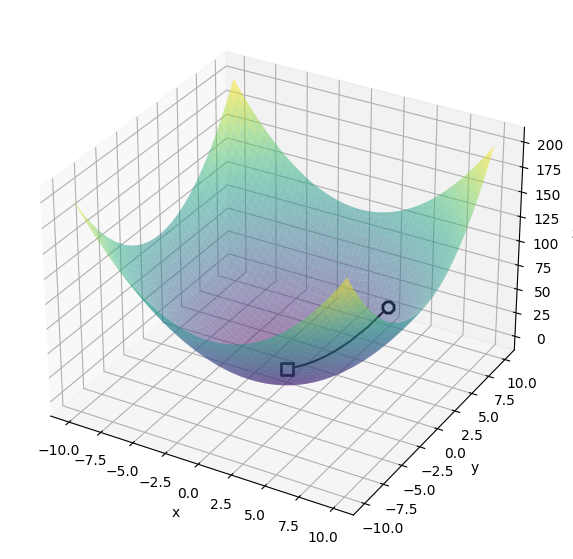

In [27]:
Sphere_history_momentum = Gradient_Descent_Momentum(Sphere_func, start = np.array([5.0, 5.0]),
             nepoch = 200, delta = 0.001)
draw_result(Sphere_func.function, Sphere_func.borders, Sphere_func.min_xyz, Sphere_history_momentum, "My momentum GD", drawing = True)

---------

Адаптивная модификация

In [29]:
def Nesterov_GD(selected_fun, start, nepoch = 100,
                lr = 0.01, beta = 0.2, delta = 0.001):

    fun = selected_fun.function
    glob_min = selected_fun.min_xyz
    params = start.copy()
    historty = [np.array([params[0], params[1], fun(params)])]

    step = 0
    v_current = np.array([0, 0])
    while (step < nepoch and la.norm(historty[-1] - glob_min) > delta):
        v_current = beta * v_current - lr * selected_fun.gradient(params + beta * v_current)
        params = params + v_current
        historty.append(np.array([params[0], params[1], fun(params)]))
        step += 1

    return np.array(historty)

My Nesterov GD
Начальная точка:	[5.00 5.00 164.00]
Найденный минимум:	[1.00e+00 3.00e+00 9.71e-07]
Глобальный минимум:	[1 3 0]
Погрешность:	[-6.97e-04 6.97e-04 -9.71e-07]
Кол-во итераций:	288



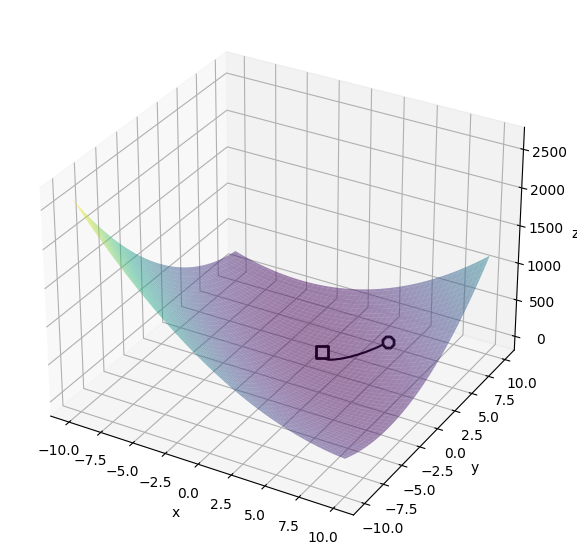

In [30]:
Booth_history_adam = Nesterov_GD(Booth_func, start = np.array([5.0, 5.0]), nepoch = 500)
draw_result(Booth_func.function, Booth_func.borders, Booth_func.min_xyz, Booth_history_adam, "My Nesterov GD", drawing = True)

My Nesterov GD
Начальная точка:	[5.00 5.00 50.00]
Найденный минимум:	[7.05e-04 7.05e-04 9.95e-07]
Глобальный минимум:	[0 0 0]
Погрешность:	[-7.05e-04 -7.05e-04 -9.95e-07]
Кол-во итераций:	351



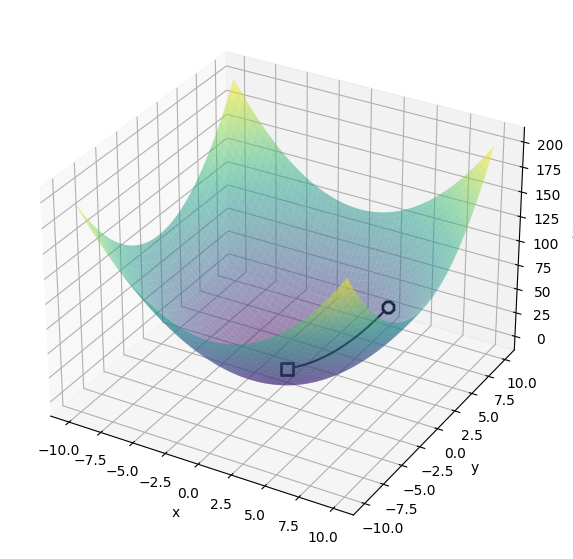

In [31]:
Sphere_history_adam = Nesterov_GD(Sphere_func, start = np.array([5.0, 5.0]), nepoch = 500)
draw_result(Sphere_func.function, Sphere_func.borders, Sphere_func.min_xyz, Sphere_history_adam, "My Nesterov GD", drawing = True)

----

Метод эволюции темпа обучения

In [32]:
def Adam(selected_fun, start, nepoch = 100, lr = 0.01,
         beta_1 = 0.6, beta_2 = 0.70, eps = 1e-8, delta = 0.001):
    fun = selected_fun.function
    glob_min = selected_fun.min_xyz
    params = start.copy()
    history = [np.array([params[0], params[1], fun(params)])]

    step = 0
    v = np.array([0, 0])
    G = np.array([0, 0])
    m_t = np.array([0, 0])
    v_t = np.array([0, 0])
    v_t_r = 0
    m_t_r = 0
    while (step < nepoch and la.norm(history[-1] - glob_min) > delta):
        step += 1
        g_t = selected_fun.gradient(params)
        m_t = beta_1 * m_t + (1 - beta_1) * g_t
        v_t = beta_2 * v_t + (1 - beta_2) * g_t**2
        m_t_r = m_t / (1 - beta_1**step)
        v_t_r = v_t / (1 - beta_2**step)

        params = params - (lr * m_t_r) / (np.sqrt(v_t_r) + eps)

        history.append(np.array([params[0], params[1], fun(params)]))

    return np.array(history)

My adam GD
Начальная точка:	[5.00 5.00 164.00]
Найденный минимум:	[1.00e+00 3.00e+00 8.36e-08]
Глобальный минимум:	[1 3 0]
Погрешность:	[-2.15e-04 1.63e-04 -8.36e-08]
Кол-во итераций:	415



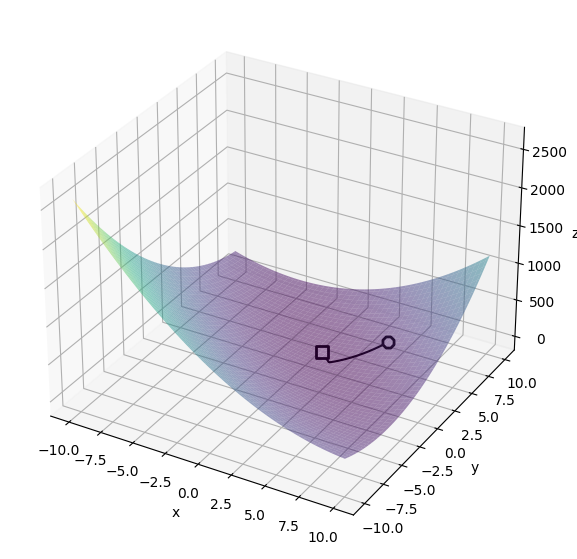

In [33]:
Booth_history_adam = Adam(Booth_func, start = np.array([5.0, 5.0]), nepoch = 500)
draw_result(Booth_func.function, Booth_func.borders, Booth_func.min_xyz, Booth_history_adam, "My adam GD", drawing = True)

My adam GD
Начальная точка:	[5.00 5.00 50.00]
Найденный минимум:	[4.12e-02 4.12e-02 3.39e-03]
Глобальный минимум:	[0 0 0]
Погрешность:	[-4.12e-02 -4.12e-02 -3.39e-03]
Кол-во итераций:	501



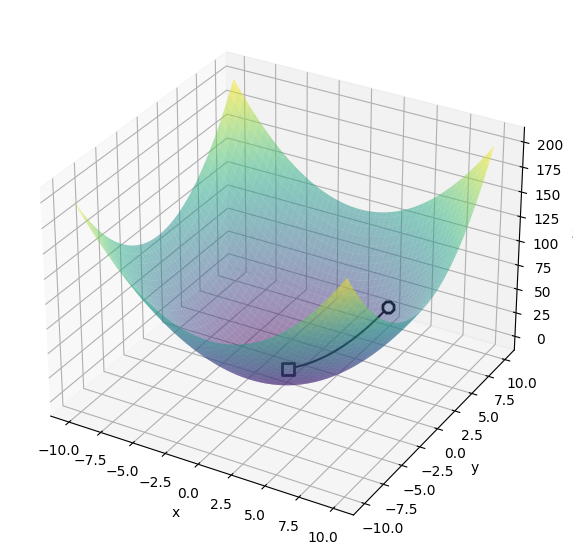

In [34]:
Sphere_history_adam = Adam(Sphere_func, start = np.array([5.0, 5.0]), nepoch = 500)
draw_result(Sphere_func.function, Sphere_func.borders, Sphere_func.min_xyz, Sphere_history_adam, "My adam GD", drawing = True)